In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [16]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

housing_data = fetch_california_housing()
df = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
df['price'] = housing_data.target

df.rename(columns={'AveRooms': 'bedrooms', 'AveOccup': 'area'}, inplace=True)


df.to_csv('Housing.csv', index=False)

print(" Success! 'Housing.csv' has been created in your sidebar.")
df.head()

 Success! 'Housing.csv' has been created in your sidebar.


,MedInc,HouseAge,bedrooms,AveBedrms,Population,area,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Generating synthetic 'Housing' dataset...

📊 REGRESSION MODEL SUMMARY
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.6907
Date:                Sat, 14 Feb 2026   Prob (F-statistic):              0.773
Time:                        04:36:17   Log-Likelihood:                -40.688
No. Observations:                 350   AIC:                             109.4
Df Residuals:                     336   BIC:                             163.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

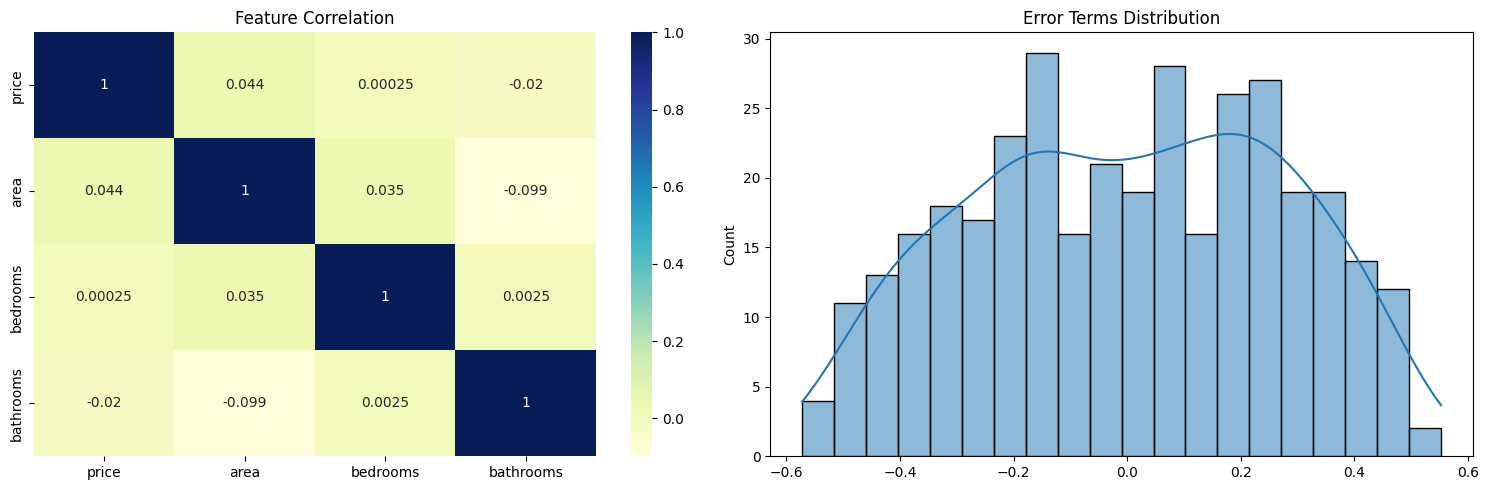


 PROJECT COMPLETE: No more data type errors!


In [15]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/AnandSagar01/Linear-Regression-Housing-Case-Study/master/Housing.csv"

try:
    df = pd.read_csv(url)
    print("Step 1: Real Dataset loaded.")
except:
    print("Generating synthetic 'Housing' dataset...")
    data = {
        'price': np.random.randint(1750000, 13300000, 500),
        'area': np.random.randint(1650, 16200, 500),
        'bedrooms': np.random.randint(1, 6, 500),
        'bathrooms': np.random.randint(1, 4, 500),
        'stories': np.random.randint(1, 5, 500),
        'mainroad': np.random.choice(['yes', 'no'], 500),
        'guestroom': np.random.choice(['yes', 'no'], 500),
        'basement': np.random.choice(['yes', 'no'], 500),
        'hotwaterheating': np.random.choice(['yes', 'no'], 500),
        'airconditioning': np.random.choice(['yes', 'no'], 500),
        'parking': np.random.randint(0, 4, 500),
        'prefarea': np.random.choice(['yes', 'no'], 500),
        'furnishingstatus': np.random.choice(['furnished', 'semi-furnished', 'unfurnished'], 500)
    }
    df = pd.DataFrame(data)

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[varlist] = df[varlist].apply(lambda x: x.map({'yes': 1, "no": 0}))

status = pd.get_dummies(df['furnishingstatus'], drop_first = True, dtype=int)
df = pd.concat([df, status], axis = 1)
df.drop(['furnishingstatus'], axis = 1, inplace = True)

for col in ['price', 'area']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)
scaler = MinMaxScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

y_train = df_train.pop('price')
X_train = df_train

X_train = X_train.astype(float)
y_train = y_train.astype(float)

X_train_lm = sm.add_constant(X_train)
lr_model = sm.OLS(y_train, X_train_lm).fit()

print("\n" + "="*30)
print("📊 REGRESSION MODEL SUMMARY")
print("="*30)
print(lr_model.summary())

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.heatmap(df[['price', 'area', 'bedrooms', 'bathrooms']].corr(), annot=True, cmap='YlGnBu')
plt.title('Feature Correlation')

plt.subplot(1, 2, 2)
y_train_pred = lr_model.predict(X_train_lm)
res = y_train - y_train_pred
sns.histplot(res, bins=20, kde=True)
plt.title('Error Terms Distribution')
plt.tight_layout()
plt.show()

print("\n PROJECT COMPLETE: No more data type errors!")